<a href="https://colab.research.google.com/github/gkakani1/GOUTHAM-DATA606/blob/main/Code/EDA/crops_Datasets_EDA/EDA_of_crops_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

## Exploratory Data Analysis of crops datasets 

##  Mounting Google Drive files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing required modules and libraries

In [ ]:
import glob
import pandas as pd
import re 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Storing the path of all the excel files related to all 10 perishable food crops in my google drive into a list

In [ ]:
path = "/content/drive/MyDrive/Capstone/Datasets/Vegtables/" # Path to my vegetable dataset in google drive(Accessible to UMBC group members)
files = glob.glob(path+"*") #Using glob module to return the fies of 10 different perishable food crops 
print(files) # Printing all the food crop files path
print("No:of files in the directory : ",len(files)) # Checking no:of files in the list 

['/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Brinjal', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Cabbage', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Cauliflower', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Green Chillies', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Okra', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Onion', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Peas', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Tomato Hybrid', '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Tomato Local']
No:of files in the directory :  10


In [ ]:
xlsx_files= [] # Creating an empty list 
for i in range(0,10):
  file1 = glob.glob(files[i]+"/*")# Adding "/*" to the end of each folder path to retrieve all the files in that folder
  xlsx_files.append(file1) # Appending all the files retrieved from that folder into xlsx.files list 
 

In [ ]:
for i in range(0,len(xlsx_files)):# Printing no:of excel files related to each individual food crop
  print(len(xlsx_files[i]))
xlsx_files # Pring all the excel files


11
11
11
11
11
11
11
11
11
11


[['/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2011.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2012.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/Bg 2013.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2014.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2015.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2016.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2017.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2018.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2020.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2019.xls.xlsx',
  '/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bitter Gourd/BG 2021.xls.xlsx'],
 ['/content/drive/MyDrive/Capstone/Datasets/Vegtables/Bri

## Creating a dataframe from all the excel files

In [ ]:
df1  = pd.read_excel(xlsx_files[0][0])# Loading a sample excel file into a dataframe
df1.head() # Printing top 5 rows

,Report Name : Monthwise Annual Price & Arrival Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Current Date : 07/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Selected Year : 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crop Category : VEGETABLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Crop Name : BITTER GOURD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Variety Name : BITTER GOURD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

list_row = [] # Creating an empty list for row values
list_col = [] # Creating an empty list for column values
list_states = [] # Creating an empty list for city names
for i in range(0,10): # value of "i" in range of no:of food crops
  list_row1 = []
  list_col1 = []
  for j in range(0,11): # value of "j" in range of no:of individual excel files in a pirticular food crop
    df2 = pd.read_excel(xlsx_files[i][j]) # Reading a pirticular food crop into a dataframe named df2
# Column name for city at which the crop is collected is "Unnamed: 1".
    for a in list(df2['Unnamed: 1']):  # For each cell value in "Unnamed:1" column
      if a not in list_states: # If it is not in "list_states" list
        list_states.append(a) # Append it to the list 
    list_row1.append(len(df2)) # Appending the value of no:of rows of that dataframe into a list named list_row1 
    list_col1.append(len(df2.columns))# Appending the value of no:of columns of that dataframe into a list named list_col1 
    
  list_row.append(list_row1) # Appending list of all the row lengths of individual files of a crop into a list
  list_col.append(list_col1) # Appending list of all the column lengths of individual files of a crop into a list


In [ ]:
list_row # Printing row lengths of all the individual files 

[[35, 35, 33, 33, 32, 32, 36, 35, 29, 34, 30],
 [25, 27, 29, 29, 29, 25, 28, 28, 29, 29, 28],
 [37, 36, 36, 37, 35, 34, 25, 25, 35, 25, 32],
 [32, 37, 37, 36, 36, 34, 35, 35, 35, 36, 35],
 [34, 34, 35, 37, 36, 37, 32, 35, 35, 36, 36],
 [36, 32, 36, 31, 35, 34, 36, 33, 36, 33, 35],
 [32, 37, 37, 38, 37, 37, 37, 37, 38, 36, 37],
 [33, 32, 31, 31, 31, 27, 32, 34, 32, 36, 35],
 [33, 35, 35, 38, 36, 36, 38, 35, 38, 36, 37],
 [24, 24, 26, 27, 29, 28, 30, 31, 25, 29, 29]]

In [ ]:
# Printing the value of maximum number of rows of an excel file among all the files present 
max1 = 0 
for l in list_row:
  max1 = max(max1,max(l))
print(max1)

38


In [ ]:
list_col # Printing column lengths of all the individual files 

[[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38],
 [38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 38]]

In [ ]:
# Conclusion:  All the datasets consists of equal number of columns that is 38

In [ ]:
# List of all the unique states present in entire vegetebale datasets 
list_states = []
for i in range(0,10):
  for j in range(0,11):
    df3 = pd.read_excel(xlsx_files[i][j])
    for a in list(df3['Unnamed: 1']):
      if a not in list_states:
        list_states.append(a)

In [ ]:
# List of all the city names
list_states

[nan,
 'Center Name',
 'AHMEDABAD / अहमदाबाद',
 'AMRITSAR / अमृतसर',
 'BANGALURU / बेंगलुरू',
 'BARAUT / बड़ौत',
 'BHOPAL / भोपाल',
 'BHUBANESHWAR / भुबनेश्वर',
 'CHANDIGARH / चंडीगढ़',
 'CHENNAI / चेन्नई',
 'DEHRADUN / देहरादून',
 'DELHI / दिल्ली',
 'GANGATOK / गंगटोक',
 'GUWAHATI / गुवाहाटी',
 'HYDERABAD / हैदराबाद',
 'JAIPUR / जयपुर',
 'JAMMU / जम्मू',
 'KOLKATA / कोलकाता',
 'LUCKNOW / लखनऊ',
 'MUMBAI / मुंबई',
 'NAGPUR / नागपुर',
 'NASIK / नाशिक',
 'PATNA / पटना',
 'PUNE / पुणे',
 'RAIPUR / रायपुर',
 'RANCHI / रांची',
 'SHIMLA / शिमला',
 'SRINAGAR / श्रीनगर',
 'TRIVENDRUM / त्रिवेन्द्रम',
 'PIMPALGAON / पिंपलगाँव',
 'VARANASI / वाराणसी',
 'VIJAYAWADA / विजयवाड़ा',
 'AHMEDABAD / à¤…à¤¹à¤®à¤¦à¤¾à¤¬à¤¾à¤¦',
 'BHOPAL / à¤\xadà¥‹à¤ªà¤¾à¤²',
 'BHUBANESHWAR / à¤\xadà¥\x81à¤¬à¤¨à¥‡à¤¶à¥\x8dà¤µà¤°',
 'CHENNAI / à¤šà¥‡à¤¨à¥\x8dà¤¨à¤ˆ',
 'DELHI / à¤¦à¤¿à¤²à¥\x8dà¤²à¥€',
 'GANGATOK / à¤—à¤‚à¤—à¤Ÿà¥‹à¤•',
 'GUWAHATI / à¤—à¥\x81à¤µà¤¾à¤¹à¤¾à¤Ÿà¥€',
 'HYDERABAD / à¤¹à¥ˆà¤¦à¤°à¤¾à¤¬à¤¾à¤¦',
 'JAMMU /

In [ ]:
len(list_states) # No:of cities present in all the excel files 

55

In [ ]:
"""" Conclusion:
          1)There are 55 different city names 
          2)India consists of 28 states and 7 union teritories 
          3)So the data might be collected from different places in a single state in different years""" 

'" Conclusion:\n          1)There are 55 different city names \n          2)India consists of 28 states and 7 union teritories \n          3)So the data might be collected from different places in a single state in different years'

In [ ]:
# Appending all the individual dataframes from each individual excel files into df_original dataframe  
df_original = pd.DataFrame() # Creating an empty data frame 
for i in range(0,10): # value of "i" in range of no:of food crops
  for j in range(0,11): # value of "j" in range of no:of individual excel files in a pirticular food crop
    df_i = pd.read_excel(xlsx_files[i][j]) # Reading a pirticular food crop into a dataframe named df_i
    df_original = df_original.append(df_i, ignore_index = True) # Appending df_i to df_original dataframe 


In [ ]:
# Returning top 10 rows of df_original dataframe 
df_original.head(10)

,Report Name : Monthwise Annual Price & Arrival Report,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37
0,Current Date : 07/02/2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Selected Year : 2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Crop Category : VEGETABLES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Crop Name : BITTER GOURD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Variety Name : BITTER GOURD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,January,NaN,NaN,February,NaN,NaN,March,NaN,...,NaN,October,NaN,NaN,November,NaN,NaN,December,NaN,NaN
7,S.No.,Center Name,W.sale Avg.Price,Retail Avg. Price,Total Arrival,W.sale Avg.Price,Retail Avg. Price,Total Arrival,W.sale Avg.Price,Retail Avg. Price,...,Total Arrival,W.sale Avg.Price,Retail Avg. Price,Total Arrival,W.sale Avg.Price,Retail Avg. Price,Total Arrival,W.sale Avg.Price,Retail Avg. Price,Total Arrival
8,1,AHMEDABAD / अहमदाबाद,0,0,0,0,0,0,1307,3238,...,806,960,2500,167,800,2000,46,0,0,0
9,2,AMRITSAR / अमृतसर,0,0,0,0,0,0,0,0,...,68,1076,2476,55,0,0,0,0,0,0


## Modifying the combined dataset
  ### 1) Deleting unwanted rows
  ### 2) Deleting unwanted columns
  ### 3) Renaming the header values
  

In [ ]:
# I just want "W.sale Avg.Price" price of month and want to delete both "Retail Avg. Price"	and "Total Arrival"	columns 

list1 = [0,1,2,38,39] # Selecting list of column indexes to delete unwanted columns 
# Creating a list of unwanted columns from the dataframe 
for i in range(1,12):
  list1.append(((i)*(3))+2)
list_rem = list(range(0,40))
for i in list1:
  if i in list_rem:
    list_rem.remove(i)
print("List of unwanted column indexes are ", list_rem) 


List of unwanted column indexes are  [3, 4, 6, 7, 9, 10, 12, 13, 15, 16, 18, 19, 21, 22, 24, 25, 27, 28, 30, 31, 33, 34, 36, 37]


In [ ]:
df_final = pd.DataFrame()
for i in range(0,10): # value of "i" in range of no:of food crops
  for j in range(0,11): # value of "j" in range of no:of individual excel files in a pirticular food crop
    df_i = pd.read_excel(xlsx_files[i][j]) # Reading a pirticular food crop into a dataframe named df2
    year = df_i.iat[1,0]
    df_i.insert(38, "Year", year[-4:])# Creatiing a new column named Year
    Crop_variety = df_i.iat[4,0]
    df_i.insert(38, "Crop", Crop_variety[14:])# Creating a new column named Crop
    df_i = df_i.iloc[6:,:,] # Removing top 6 unwanted rows
    df_i = df_i.drop(df_i.columns[list_rem],axis=1) # Dropping unwanted columns using the "list_rem" ceated above
    head_list = df_i.iloc[1,0:2].values.tolist() # Selecting cell values for header values
    list2 = df_i.iloc[0,2:14].values.tolist()
    list2 = ["Price in "+x for x in list2] # Modifying the string value for better understanding
    head_list = head_list + list2
    head_list = head_list + df_i.columns.values.tolist()[-2:]  # Final list of headed values
    df_i.columns = head_list # Assigning head_list values to header column values
    df_i = df_i.drop(labels=[6,7],axis = 0) # Removing unwanted rows
    df_i= df_i.reset_index(drop= True) # Resetting the index value starting from "0"
    df_final = df_final.append(df_i, ignore_index = True) # # Appending df_i to df_final dataframe 



In [ ]:
# Printing top 10 rows of final combined dataframe
df_final.head(10)

,S.No.,Center Name,Price in January,Price in February,Price in March,Price in April,Price in May,Price in June,Price in July,Price in August,Price in September,Price in October,Price in November,Price in December,Crop,Year
0,1,AHMEDABAD / अहमदाबाद,0,0,1307,1119,751,1729,1164,1173,1139,960,800,0,BITTER GOURD,2011
1,2,AMRITSAR / अमृतसर,0,0,0,0,1179,640,942,1083,1269,1076,0,0,BITTER GOURD,2011
2,3,BANGALURU / बेंगलुरू,1410,1073,965,932,1546,1660,1589,1542,1659,1716,1563,1539,BITTER GOURD,2011
3,4,BARAUT / बड़ौत,0,0,0,1370,1018,750,1231,1061,0,0,0,0,BITTER GOURD,2011
4,5,BHOPAL / भोपाल,0,0,2546,1907,1298,1462,2262,1576,1448,1035,1608,1596,BITTER GOURD,2011
5,6,BHUBANESHWAR / भुबनेश्वर,2540,2339,1630,847,795,1498,1723,1648,2105,1926,1635,1480,BITTER GOURD,2011
6,7,CHANDIGARH / चंडीगढ़,0,0,0,0,1488,869,996,1148,1359,1457,0,0,BITTER GOURD,2011
7,8,CHENNAI / चेन्नई,1908,1387,1222,1013,1276,1248,1546,1447,1486,1500,1378,1420,BITTER GOURD,2011
8,9,DEHRADUN / देहरादून,0,0,0,2632,719,828,899,810,1306,1242,1746,2338,BITTER GOURD,2011
9,10,DELHI / दिल्ली,2342,2358,2321,2027,914,601,883,923,1346,1162,1386,1598,BITTER GOURD,2011


In [ ]:
# Checking wether individual datasets are correctly appended 

In [ ]:
len(df_final) # Length of final dataframe

2755

In [ ]:
list_row #List of length of each individual dataframe which we calculated while checking max row length value 

[[35, 35, 33, 33, 32, 32, 36, 35, 29, 34, 30],
 [25, 27, 29, 29, 29, 25, 28, 28, 29, 29, 28],
 [37, 36, 36, 37, 35, 34, 25, 25, 35, 25, 32],
 [32, 37, 37, 36, 36, 34, 35, 35, 35, 36, 35],
 [34, 34, 35, 37, 36, 37, 32, 35, 35, 36, 36],
 [36, 32, 36, 31, 35, 34, 36, 33, 36, 33, 35],
 [32, 37, 37, 38, 37, 37, 37, 37, 38, 36, 37],
 [33, 32, 31, 31, 31, 27, 32, 34, 32, 36, 35],
 [33, 35, 35, 38, 36, 36, 38, 35, 38, 36, 37],
 [24, 24, 26, 27, 29, 28, 30, 31, 25, 29, 29]]

In [ ]:
# Sum of all the individual dataframes lengths
sum1 = 0
for i in list_row:
  sum1 = sum1+sum(i)

In [ ]:
# Checking wether sum of lenths of individual datasets minus no:of rows delted is equal to df_final row length 
# len(df_final): Final data frame row length 
# we deleted 8 rows from each 11 individual files of 10 different crops so total no:of rows deleted = (8*10*11)
sum1  == (len(df_final))+(8)*(10)*(11)

True

# Cleansing final dataframe 

In [ ]:
# Replacing empty spaces in df_final column header files with  "_" charecter 
df_final.columns = df_final.columns.str.replace(' ', '_')


In [ ]:
# Checking all the perishable food crops in the final dataframe "df_final"
list_Crops = df_final.Crop.unique().tolist() # Taking all the unique food crop names from "Crop" column into a list
list_Crops # Viewing list of crops 


[' BITTER GOURD',
 ' BRINJAL LONG',
 ' CABBAGE',
 ' Select Variety',
 ' CAULIFLOWER',
 ' CHILLY',
 ' OKRA',
 ' ONION',
 ' PEAS',
 ' TOMATO HYBRID',
 ' TOMATO LOCAL']

In [ ]:
# Dropping unwanted crop name
df_final = df_final[df_final.Crop != " Select Variety"] # Droping rows where Crops column cell value is "Select Variety"
list_Crops = df_final.Crop.unique().tolist() # Perishable food crops in modified dataframe
list_Crops 

[' BITTER GOURD',
 ' BRINJAL LONG',
 ' CABBAGE',
 ' CAULIFLOWER',
 ' CHILLY',
 ' OKRA',
 ' ONION',
 ' PEAS',
 ' TOMATO HYBRID',
 ' TOMATO LOCAL']

In [ ]:
list_Cities = df_final["Center_Name"].to_list() # Taking all the cell values from "Center_Name" into a list
list_Cities # all the center names in our dataframe

['AHMEDABAD / अहमदाबाद',
 'AMRITSAR / अमृतसर',
 'BANGALURU / बेंगलुरू',
 'BARAUT / बड़ौत',
 'BHOPAL / भोपाल',
 'BHUBANESHWAR / भुबनेश्वर',
 'CHANDIGARH / चंडीगढ़',
 'CHENNAI / चेन्नई',
 'DEHRADUN / देहरादून',
 'DELHI / दिल्ली',
 'GANGATOK / गंगटोक',
 'GUWAHATI / गुवाहाटी',
 'HYDERABAD / हैदराबाद',
 'JAIPUR / जयपुर',
 'JAMMU / जम्मू',
 'KOLKATA / कोलकाता',
 'LUCKNOW / लखनऊ',
 'MUMBAI / मुंबई',
 'NAGPUR / नागपुर',
 'NASIK / नाशिक',
 'PATNA / पटना',
 'PUNE / पुणे',
 'RAIPUR / रायपुर',
 'RANCHI / रांची',
 'SHIMLA / शिमला',
 'SRINAGAR / श्रीनगर',
 'TRIVENDRUM / त्रिवेन्द्रम',
 'AHMEDABAD / अहमदाबाद',
 'AMRITSAR / अमृतसर',
 'BANGALURU / बेंगलुरू',
 'BARAUT / बड़ौत',
 'BHOPAL / भोपाल',
 'BHUBANESHWAR / भुबनेश्वर',
 'CHANDIGARH / चंडीगढ़',
 'CHENNAI / चेन्नई',
 'DEHRADUN / देहरादून',
 'DELHI / दिल्ली',
 'GANGATOK / गंगटोक',
 'GUWAHATI / गुवाहाटी',
 'HYDERABAD / हैदराबाद',
 'JAIPUR / जयपुर',
 'JAMMU / जम्मू',
 'KOLKATA / कोलकाता',
 'LUCKNOW / लखनऊ',
 'MUMBAI / मुंबई',
 'NAGPUR / नागपुर',
 'NASIK / 

In [ ]:
## Conclusion: Each value in "Center_Name" consists of unwanted character.

###  Removing non english alpabet number from our dataset 

In [ ]:
list_Cities1 = []# Taking an empty list "list_Cities1"
for i in list_Cities:# for every center name in list_Citites
  list_Cities1.append(re.sub('[^a-zA-Z]+', '', i)) # Returning the string consisting of only english alphabets and appending it to a new list

In [ ]:
df_final['Center_Name'] = df_final['Center_Name'].replace(list_Cities,list_Cities1) # Replacing the center names with modified values from above list 

In [ ]:
df_final.head() # New dataframe top 5 headers 

,S.No.,Center_Name,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December,Crop,Year
0,1,AHMEDABAD,0,0,1307,1119,751,1729,1164,1173,1139,960,800,0,BITTER GOURD,2011
1,2,AMRITSAR,0,0,0,0,1179,640,942,1083,1269,1076,0,0,BITTER GOURD,2011
2,3,BANGALURU,1410,1073,965,932,1546,1660,1589,1542,1659,1716,1563,1539,BITTER GOURD,2011
3,4,BARAUT,0,0,0,1370,1018,750,1231,1061,0,0,0,0,BITTER GOURD,2011
4,5,BHOPAL,0,0,2546,1907,1298,1462,2262,1576,1448,1035,1608,1596,BITTER GOURD,2011


### Replacing city names with state names

In [ ]:
set(list_Cities1) # Checking no:of uniquie cities in "Center_Name" column name 

{'AHMEDABAD',
 'AMRITSAR',
 'BANGALURU',
 'BARAUT',
 'BHOPAL',
 'BHUBANESHWAR',
 'CHANDIGARH',
 'CHENNAI',
 'DEHRADUN',
 'DELHI',
 'GANGATOK',
 'GUWAHATI',
 'HYDERABAD',
 'JAIPUR',
 'JAMMU',
 'KOLKATA',
 'LASALGAON',
 'LUCKNOW',
 'MUMBAI',
 'NAGPUR',
 'NASIK',
 'PATNA',
 'PIMPALGAON',
 'PUNE',
 'RAIPUR',
 'RANCHI',
 'SHIMLA',
 'SRINAGAR',
 'TRIVENDRUM',
 'VARANASI',
 'VIJAYAWADA'}

In [ ]:
# I tried to download a new excel files consisting of city names and their respecive states and replace thee Center_Name column values with respective state names 
    # I encountered following problems 
      # 1)some of the citiy names are having different spelling from our current dataset
      # 2) A city name is present in two or three different states
# Therefore I created a new list of states manually corresponding the city names from "set(list_Cities1)" values """


In [ ]:
# List of states
list_States  = ['Gujarat','Punjab','Karnataka','Uttar Pradesh','Madhya Pradesh','Odisha','Chhattisgarh','Tamil Nadu','Uttarakhand','New Delhi','Sikkim','Assam','Andhra Pradesh','Rajasthan','Jhammu & Kashmir','West Bengal','Maharashtra','Gujarat','Maharashtra','Madhya Pradesh','Maharashtra','Maharashtra','Maharashtra','Jharkhand','Chhattisgarh','Jharkhand','Jhammu & Kashmir','Jhammu & Kashmir','Kerala','Uttar Pradesh',"Andhra Pradesh"]
df_final1 = df_final
df_final['Center_Name'] = df_final['Center_Name'].replace(set(list_Cities1),list_States) # Replacing city names with its state values 

In [ ]:
df_final["Center_Name"].unique() # Checking all the states in our dataframe

array(['Chhattisgarh', 'Andhra Pradesh', 'Rajasthan', 'Jhammu & Kashmir',
       'Maharashtra', 'Gujarat', 'Madhya Pradesh', 'Jharkhand',
       'Uttar Pradesh', 'Odisha', 'Karnataka', 'Uttarakhand', 'New Delhi',
       'Punjab', 'Sikkim', 'Kerala', 'West Bengal', 'Tamil Nadu', 'Assam'],
      dtype=object)

### Filling all the missing data  

In [ ]:
# Replacing "0" with "nan" value 
df_final1 = df_final
df_final = df_final.replace(0,np.nan)

In [ ]:
df_final.isna().sum() # Checking number of nan cell values in each column of the dataframe 

S.No.                   0
Center_Name             0
Price_in_January      445
Price_in_February     441
Price_in_March        367
Price_in_April        616
Price_in_May          740
Price_in_June         746
Price_in_July         684
Price_in_August       683
Price_in_September    651
Price_in_October      621
Price_in_November     518
Price_in_December     484
Crop                    0
Year                    0
dtype: int64

In [ ]:
# Checking nan values in each column group by Crop value 
list_Crops = df_final["Crop"].unique() # List of unique crops 
for i in list_Crops: 
  a = (df_final.loc[df_final["Crop"]==i]).iloc[:,2:14] # for each crop
  print("Crop =",i, "\nTotal Number of rows = ",len(a),"\n No:of nan values in each column  \n",a.isna().sum(),"\n\n\n") # Printing total no:of rows and nan values of each column corresponding to a pirticular crop 
  

Crop =  BITTER GOURD 
Total Number of rows =  276 
 No:of nan values in each column  
 Price_in_January       97
Price_in_February     104
Price_in_March         73
Price_in_April         57
Price_in_May           38
Price_in_June          33
Price_in_July          28
Price_in_August        26
Price_in_September     28
Price_in_October       37
Price_in_November      55
Price_in_December      80
dtype: int64 



Crop =  BRINJAL LONG 
Total Number of rows =  218 
 No:of nan values in each column  
 Price_in_January      66
Price_in_February     73
Price_in_March        73
Price_in_April        83
Price_in_May          84
Price_in_June         79
Price_in_July         71
Price_in_August       75
Price_in_September    69
Price_in_October      69
Price_in_November     67
Price_in_December     71
dtype: int64 



Crop =  CABBAGE 
Total Number of rows =  218 
 No:of nan values in each column  
 Price_in_January      11
Price_in_February      9
Price_in_March        12
Price_in_April        4

### Visualizing nan values in our dataframe 

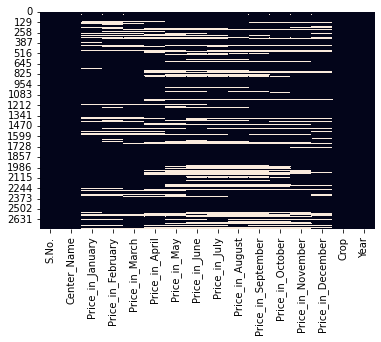

In [ ]:
# Heatmap to check null values in entire dataframe 
sns.heatmap(df_final.isnull(), cbar=False)

<Figure size 720x432 with 0 Axes>

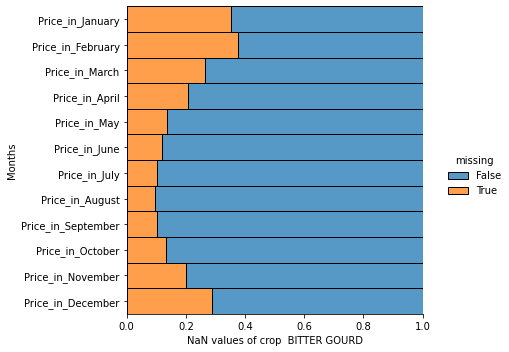

<Figure size 720x432 with 0 Axes>

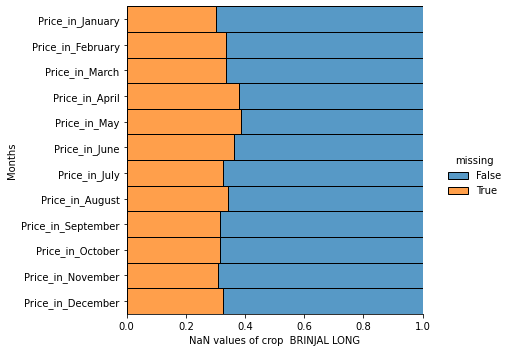

<Figure size 720x432 with 0 Axes>

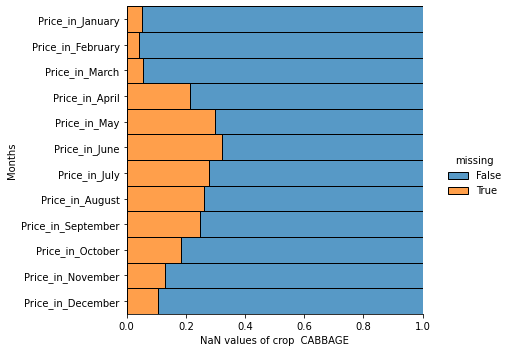

<Figure size 720x432 with 0 Axes>

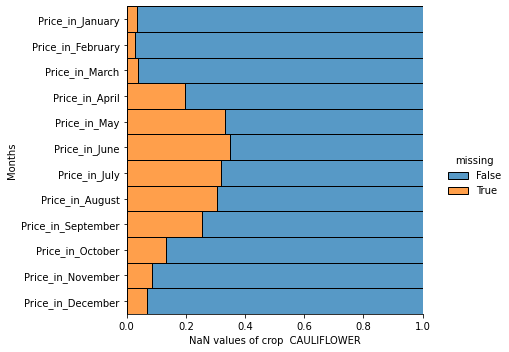

<Figure size 720x432 with 0 Axes>

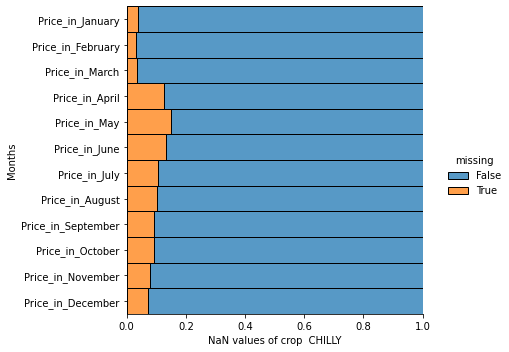

<Figure size 720x432 with 0 Axes>

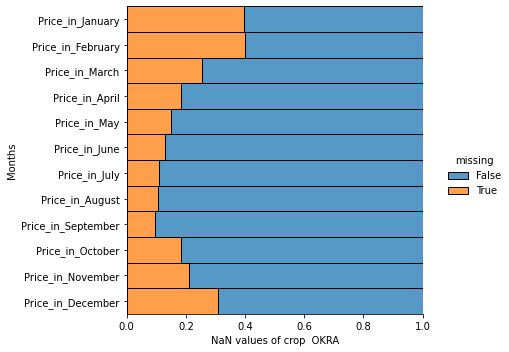

<Figure size 720x432 with 0 Axes>

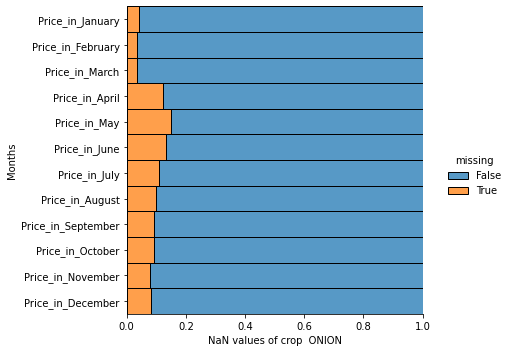

<Figure size 720x432 with 0 Axes>

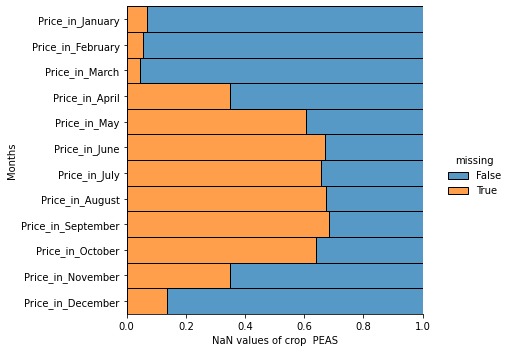

<Figure size 720x432 with 0 Axes>

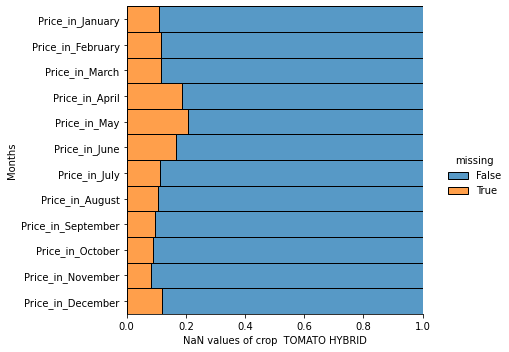

<Figure size 720x432 with 0 Axes>

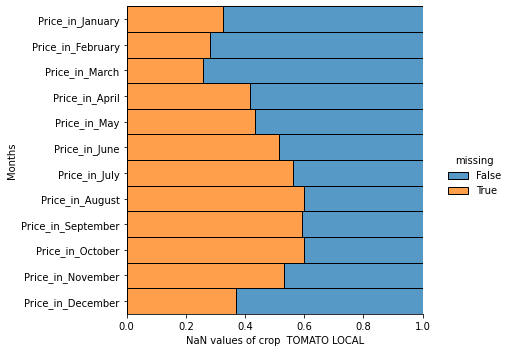

In [ ]:
# Visualizig nan values for each pirticular crop using displot() function in seaborn 
for i in list_Crops: # For each crop
  a = (df_final.loc[df_final["Crop"]==i]).iloc[:,2:14] # Taking only the columns consisting of null values 
  plt.figure(figsize=(10,6))
  d=sns.displot(
      data=a.isna().melt(value_name="missing"),
      y="variable",
      hue="missing",
      multiple="fill",
      aspect=1.25

  )
  a = "NaN values of crop "+i
  d.set( xlabel = a, ylabel = "Months") # Giving names for the x and y axis labels
  

In [ ]:
df_final.describe() # Viewing basic statistical details about our dataset 

,S.No.,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December
count,2704.000000,2259.000000,2263.000000,2337.000000,2088.000000,1964.000000,1958.000000,2020.000000,2021.000000,2053.000000,2083.000000,2186.000000,2220.000000
mean,13.391642,1828.842851,1686.865223,1746.479247,1814.579023,1806.823829,1990.763534,2384.078713,2344.732311,2245.694593,2478.453673,2453.435499,2065.427477
std,7.684691,1146.466327,1144.464681,1154.424706,1183.713416,1220.441754,1301.073018,1380.685720,1332.989698,1478.208948,1669.156620,1603.566675,1364.426792
min,1.000000,190.000000,163.000000,180.000000,248.000000,167.000000,318.000000,427.000000,258.000000,375.000000,408.000000,327.000000,242.000000
25%,7.000000,971.000000,808.500000,868.000000,914.000000,982.500000,1145.250000,1416.750000,1431.000000,1312.000000,1442.000000,1351.250000,1137.500000
50%,13.000000,1533.000000,1361.000000,1435.000000,1475.000000,1467.000000,1623.500000,2101.000000,2010.000000,1835.000000,2090.000000,2091.000000,1781.000000
75%,20.000000,2467.000000,2318.000000,2372.000000,2461.250000,2270.000000,2487.250000,2952.000000,2956.000000,2640.000000,2964.500000,3103.000000,2631.000000
max,30.000000,9563.000000,8600.000000,11000.000000,8868.000000,13250.000000,14659.000000,14846.000000,13571.000000,13750.000000,17750.000000,15133.000000,12294.000000


In [ ]:
# Replacing all the nan values with mean vlaue of the row 
for i in range(0,len(df_final)):
  df_final.iloc[i] = df_final.iloc[i].fillna(value=df_final.iloc[i,2:-2].mean())

In [ ]:
# Checking the null values of modified data frame
df_final.isnull().sum()

S.No.                 0
Center_Name           0
Price_in_January      3
Price_in_February     3
Price_in_March        3
Price_in_April        3
Price_in_May          3
Price_in_June         3
Price_in_July         3
Price_in_August       3
Price_in_September    3
Price_in_October      3
Price_in_November     3
Price_in_December     3
Crop                  0
Year                  0
dtype: int64

In [ ]:
df_final.iloc[:,2:-2][df_final.iloc[:,2:-2].isnull().any(axis=1)]# Viewing all the rows with completer null values


,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December
357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
426,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Dropping all those empty rows using index value 
df_final.drop([357,385,426],0, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


### Checking wether for a pirticular crop whether all the center names from each year is same 

In [ ]:

for i in list_Crops: # For each crop
  list_States_test = []
  list_Year = df_final[df_final.Crop == i].Year.unique()# Taking list of year values into a list
  for j in list_Year: # For a year 
    df_samp1 = df_final[df_final.Crop == i][df_final.Year == j]
    list_States_test.append(df_samp1.Center_Name.unique().tolist()) # Taking all the unique states into a list 
  #print("\n",list_States_test)
  set_States = set(list_States_test[0]) # Taking first list of states for a year into a a set 
  # For each list of years corresponding to a crop
  for c in range(1,len(list_States_test)):
    set_States = set_States.intersection(set(list_States_test[c])) # Adding all the center names from different years that are not in the above set
  print("\nCrop Name",i,list_States_test.count(list_States_test[0]) == len(list_States_test),set_States) # Checking wether first set of unique state names is same as the one which consists of all the set of state names from every year
  



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  



Crop Name  BITTER GOURD False {'Gujarat', 'Andhra Pradesh', 'Punjab', 'Sikkim', 'New Delhi', 'Jharkhand', 'Rajasthan', 'Karnataka', 'Odisha', 'Maharashtra', 'Jhammu & Kashmir', 'Madhya Pradesh', 'West Bengal', 'Uttarakhand', 'Chhattisgarh'}

Crop Name  BRINJAL LONG False {'Gujarat', 'Punjab', 'West Bengal', 'Sikkim', 'Jharkhand', 'Maharashtra', 'Kerala', 'Madhya Pradesh', 'Jhammu & Kashmir', 'Chhattisgarh'}

Crop Name  CABBAGE False {'Gujarat', 'Andhra Pradesh', 'Punjab', 'Jhammu & Kashmir', 'Sikkim', 'New Delhi', 'Jharkhand', 'Rajasthan', 'Karnataka', 'Odisha', 'Maharashtra', 'Kerala', 'Madhya Pradesh', 'West Bengal', 'Uttarakhand', 'Chhattisgarh'}

Crop Name  CAULIFLOWER False {'Gujarat', 'Andhra Pradesh', 'Punjab', 'West Bengal', 'Sikkim', 'New Delhi', 'Jharkhand', 'Rajasthan', 'Karnataka', 'Odisha', 'Maharashtra', 'Kerala', 'Madhya Pradesh', 'Jhammu & Kashmir', 'Uttarakhand', 'Chhattisgarh'}

Crop Name  CHILLY False {'Gujarat', 'Andhra Pradesh', 'Punjab', 'Sikkim', 'New Delhi', 'J

In [ ]:
# Conclusion: Each year data for a pirticular crop consists of different state details 

### Checking thee no:of years data each crop consists 

In [ ]:
df_final["Year"] = df_final["Year"].astype(str).astype(int) # Changing the Year column from "str" to "int" type
dict1 = {} # Creating an empty dictionary
for i in list_Crops:
                                                                    
  dict1[i] = ((df_final[df_final.Crop == i]).Year.unique().tolist()) # Assigning the a crops year values into dictionary whoes key is the name of crop

  

In [ ]:
dict1 # Printing the above dictionary 

{' BITTER GOURD': [2011,
  2012,
  2013,
  2014,
  2015,
  2016,
  2017,
  2018,
  2020,
  2019,
  2021],
 ' BRINJAL LONG': [2020,
  2019,
  2018,
  2017,
  2015,
  2021,
  2012,
  2014,
  2011,
  2016,
  2013],
 ' CABBAGE': [2020, 2018, 2017, 2019, 2016, 2015, 2014, 2021],
 ' CAULIFLOWER': [2021,
  2020,
  2019,
  2018,
  2017,
  2015,
  2014,
  2016,
  2013,
  2012,
  2011],
 ' CHILLY': [2015, 2014, 2013, 2020, 2018, 2019, 2021, 2016, 2011, 2012, 2017],
 ' OKRA': [2011, 2021, 2018, 2020, 2017, 2016, 2013, 2015, 2019, 2014, 2012],
 ' ONION': [2021, 2020, 2019, 2018, 2014, 2012, 2013, 2016, 2017, 2015, 2011],
 ' PEAS': [2016, 2015, 2014, 2013, 2020, 2021, 2011, 2012, 2019, 2017, 2018],
 ' TOMATO HYBRID': [2022,
  2020,
  2014,
  2018,
  2011,
  2013,
  2019,
  2015,
  2017,
  2016,
  2012],
 ' TOMATO LOCAL': [2021,
  2020,
  2013,
  2018,
  2015,
  2017,
  2014,
  2011,
  2019,
  2016,
  2012]}

In [ ]:
# Reseting the index value starting from "0"
df_final = df_final.reset_index(drop=True)

In [ ]:
# Final modified and clensed vegetable dataframe 

df_final.head(10)

,S.No.,Center_Name,Price_in_January,Price_in_February,Price_in_March,Price_in_April,Price_in_May,Price_in_June,Price_in_July,Price_in_August,Price_in_September,Price_in_October,Price_in_November,Price_in_December,Crop,Year
0,1,Chhattisgarh,1126.888889,1126.888889,1307.000000,1119.0,751.0,1729.0,1164.0,1173.0,1139.0,960.0,800.0,1126.888889,BITTER GOURD,2011
1,2,Andhra Pradesh,1031.500000,1031.500000,1031.500000,1031.5,1179.0,640.0,942.0,1083.0,1269.0,1076.0,1031.5,1031.500000,BITTER GOURD,2011
2,3,Rajasthan,1410.000000,1073.000000,965.000000,932.0,1546.0,1660.0,1589.0,1542.0,1659.0,1716.0,1563.0,1539.000000,BITTER GOURD,2011
3,4,Jhammu & Kashmir,1086.000000,1086.000000,1086.000000,1370.0,1018.0,750.0,1231.0,1061.0,1086.0,1086.0,1086.0,1086.000000,BITTER GOURD,2011
4,5,Maharashtra,1673.800000,1673.800000,2546.000000,1907.0,1298.0,1462.0,2262.0,1576.0,1448.0,1035.0,1608.0,1596.000000,BITTER GOURD,2011
5,6,Jhammu & Kashmir,2540.000000,2339.000000,1630.000000,847.0,795.0,1498.0,1723.0,1648.0,2105.0,1926.0,1635.0,1480.000000,BITTER GOURD,2011
6,7,Chhattisgarh,1219.500000,1219.500000,1219.500000,1219.5,1488.0,869.0,996.0,1148.0,1359.0,1457.0,1219.5,1219.500000,BITTER GOURD,2011
7,8,Andhra Pradesh,1908.000000,1387.000000,1222.000000,1013.0,1276.0,1248.0,1546.0,1447.0,1486.0,1500.0,1378.0,1420.000000,BITTER GOURD,2011
8,9,Gujarat,1391.111111,1391.111111,1391.111111,2632.0,719.0,828.0,899.0,810.0,1306.0,1242.0,1746.0,2338.000000,BITTER GOURD,2011
9,10,Madhya Pradesh,2342.000000,2358.000000,2321.000000,2027.0,914.0,601.0,883.0,923.0,1346.0,1162.0,1386.0,1598.000000,BITTER GOURD,2011


### Scatter plot of the dataframe 

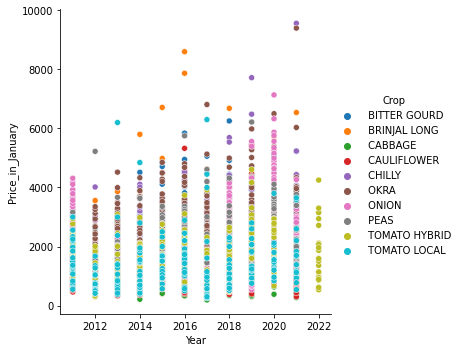

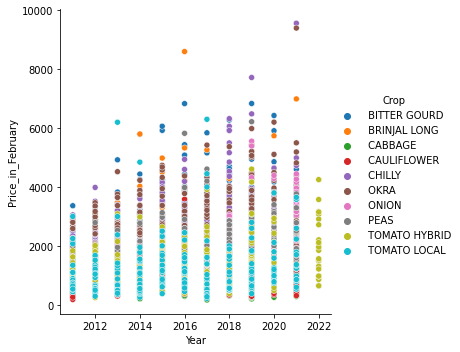

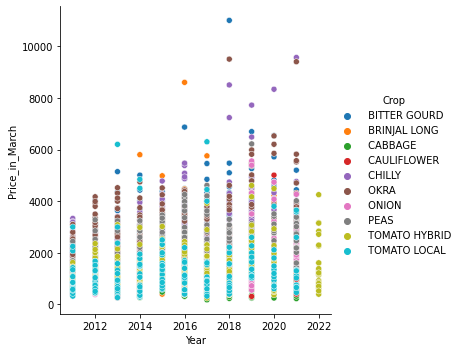

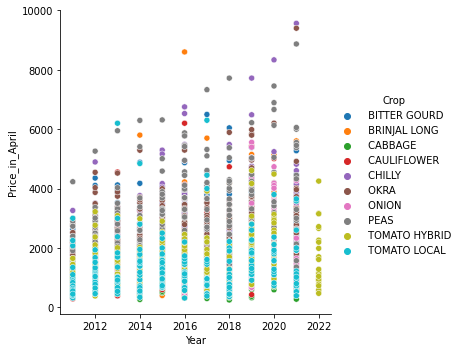

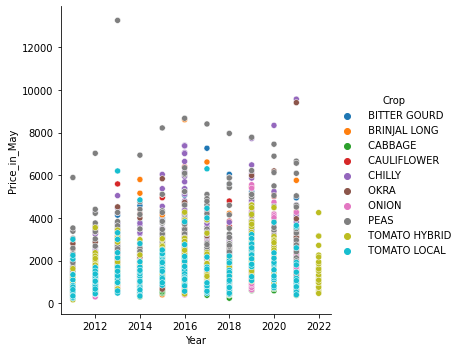

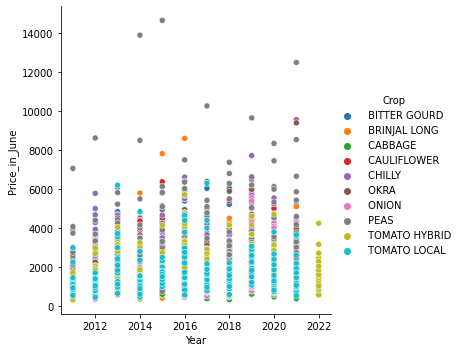

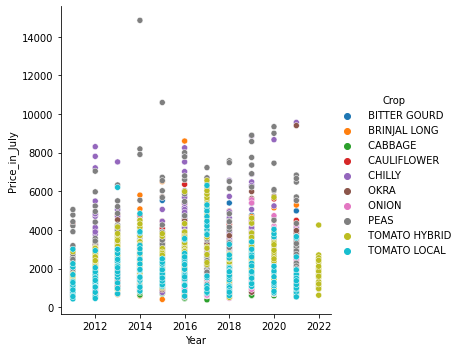

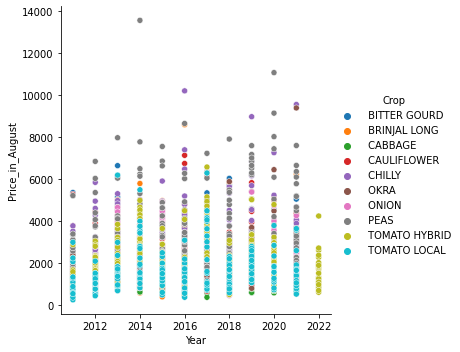

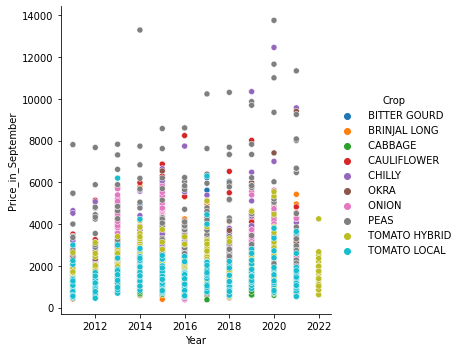

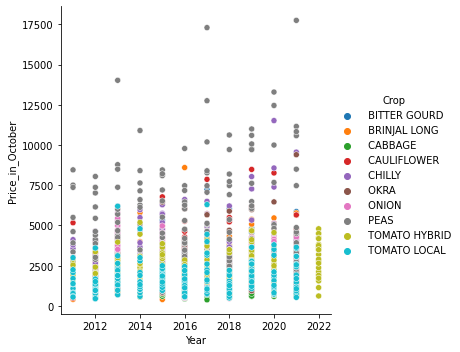

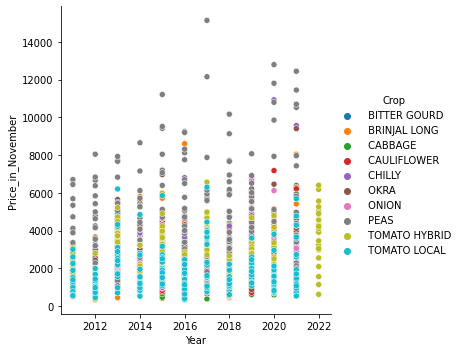

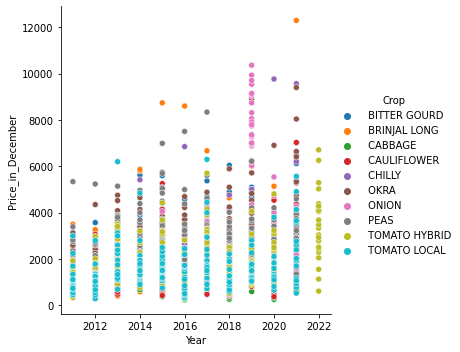

In [ ]:
head_list1 = df_final.columns.values # Header values of columns 
for i in head_list1[2:-2]: # Taking header values of the columns that has values
  sns.relplot(
    data=df_final, x="Year", y="{}".format(i),
    hue = "Crop",
    kind="scatter"
  )


In [ ]:
# Conclusion: I dont see considerable outliers in the dataframe.

In [ ]:
df_final.to_excel(r'/content/drive/MyDrive/Capstone/Datasets/Final_Datasets/Final_Crops_Dataset.xlsx', index = False)